In [1]:
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.3 MB/s eta 0:00:00


In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip
!unzip LD2011_2014.txt.zip

--2023-04-18 21:01:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261335609 (249M) [application/x-httpd-php]
Saving to: ‘LD2011_2014.txt.zip’

LD2011_2014.txt.zip 100%[===================>] 249.23M  41.9MB/s    in 6.3s    

2023-04-18 21:01:15 (39.4 MB/s) - ‘LD2011_2014.txt.zip’ saved [261335609/261335609]

Archive:  LD2011_2014.txt.zip
  inflating: LD2011_2014.txt         
   creating: __MACOSX/
  inflating: __MACOSX/._LD2011_2014.txt  


In [3]:
!head LD2011_2014.txt


"";"MT_001";"MT_002";"MT_003";"MT_004";"MT_005";"MT_006";"MT_007";"MT_008";"MT_009";"MT_010";"MT_011";"MT_012";"MT_013";"MT_014";"MT_015";"MT_016";"MT_017";"MT_018";"MT_019";"MT_020";"MT_021";"MT_022";"MT_023";"MT_024";"MT_025";"MT_026";"MT_027";"MT_028";"MT_029";"MT_030";"MT_031";"MT_032";"MT_033";"MT_034";"MT_035";"MT_036";"MT_037";"MT_038";"MT_039";"MT_040";"MT_041";"MT_042";"MT_043";"MT_044";"MT_045";"MT_046";"MT_047";"MT_048";"MT_049";"MT_050";"MT_051";"MT_052";"MT_053";"MT_054";"MT_055";"MT_056";"MT_057";"MT_058";"MT_059";"MT_060";"MT_061";"MT_062";"MT_063";"MT_064";"MT_065";"MT_066";"MT_067";"MT_068";"MT_069";"MT_070";"MT_071";"MT_072";"MT_073";"MT_074";"MT_075";"MT_076";"MT_077";"MT_078";"MT_079";"MT_080";"MT_081";"MT_082";"MT_083";"MT_084";"MT_085";"MT_086";"MT_087";"MT_088";"MT_089";"MT_090";"MT_091";"MT_092";"MT_093";"MT_094";"MT_095";"MT_096";"MT_097";"MT_098";"MT_099";"MT_100";"MT_101";"MT_102";"MT_103";"MT_104";"MT_105";"MT_106";"MT_107";"MT_108";"MT_109";"MT_110";"MT_111

In [27]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from gluonts.mx import DeepAREstimator, Trainer


import numpy as np
df=pd.read_csv('LD2011_2014.txt',sep=';',index_col=0,parse_dates=True,decimal=',')
df.shape

(140256, 370)

In [6]:
df.head()

MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                     MT_008  MT_009  MT_010  ...  MT_361  MT_362  MT_363  \
2011-01-01 00:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   

                     MT_364  MT_365  MT_366  MT_367  MT_368  MT_369  MT_370  
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 370 columns]

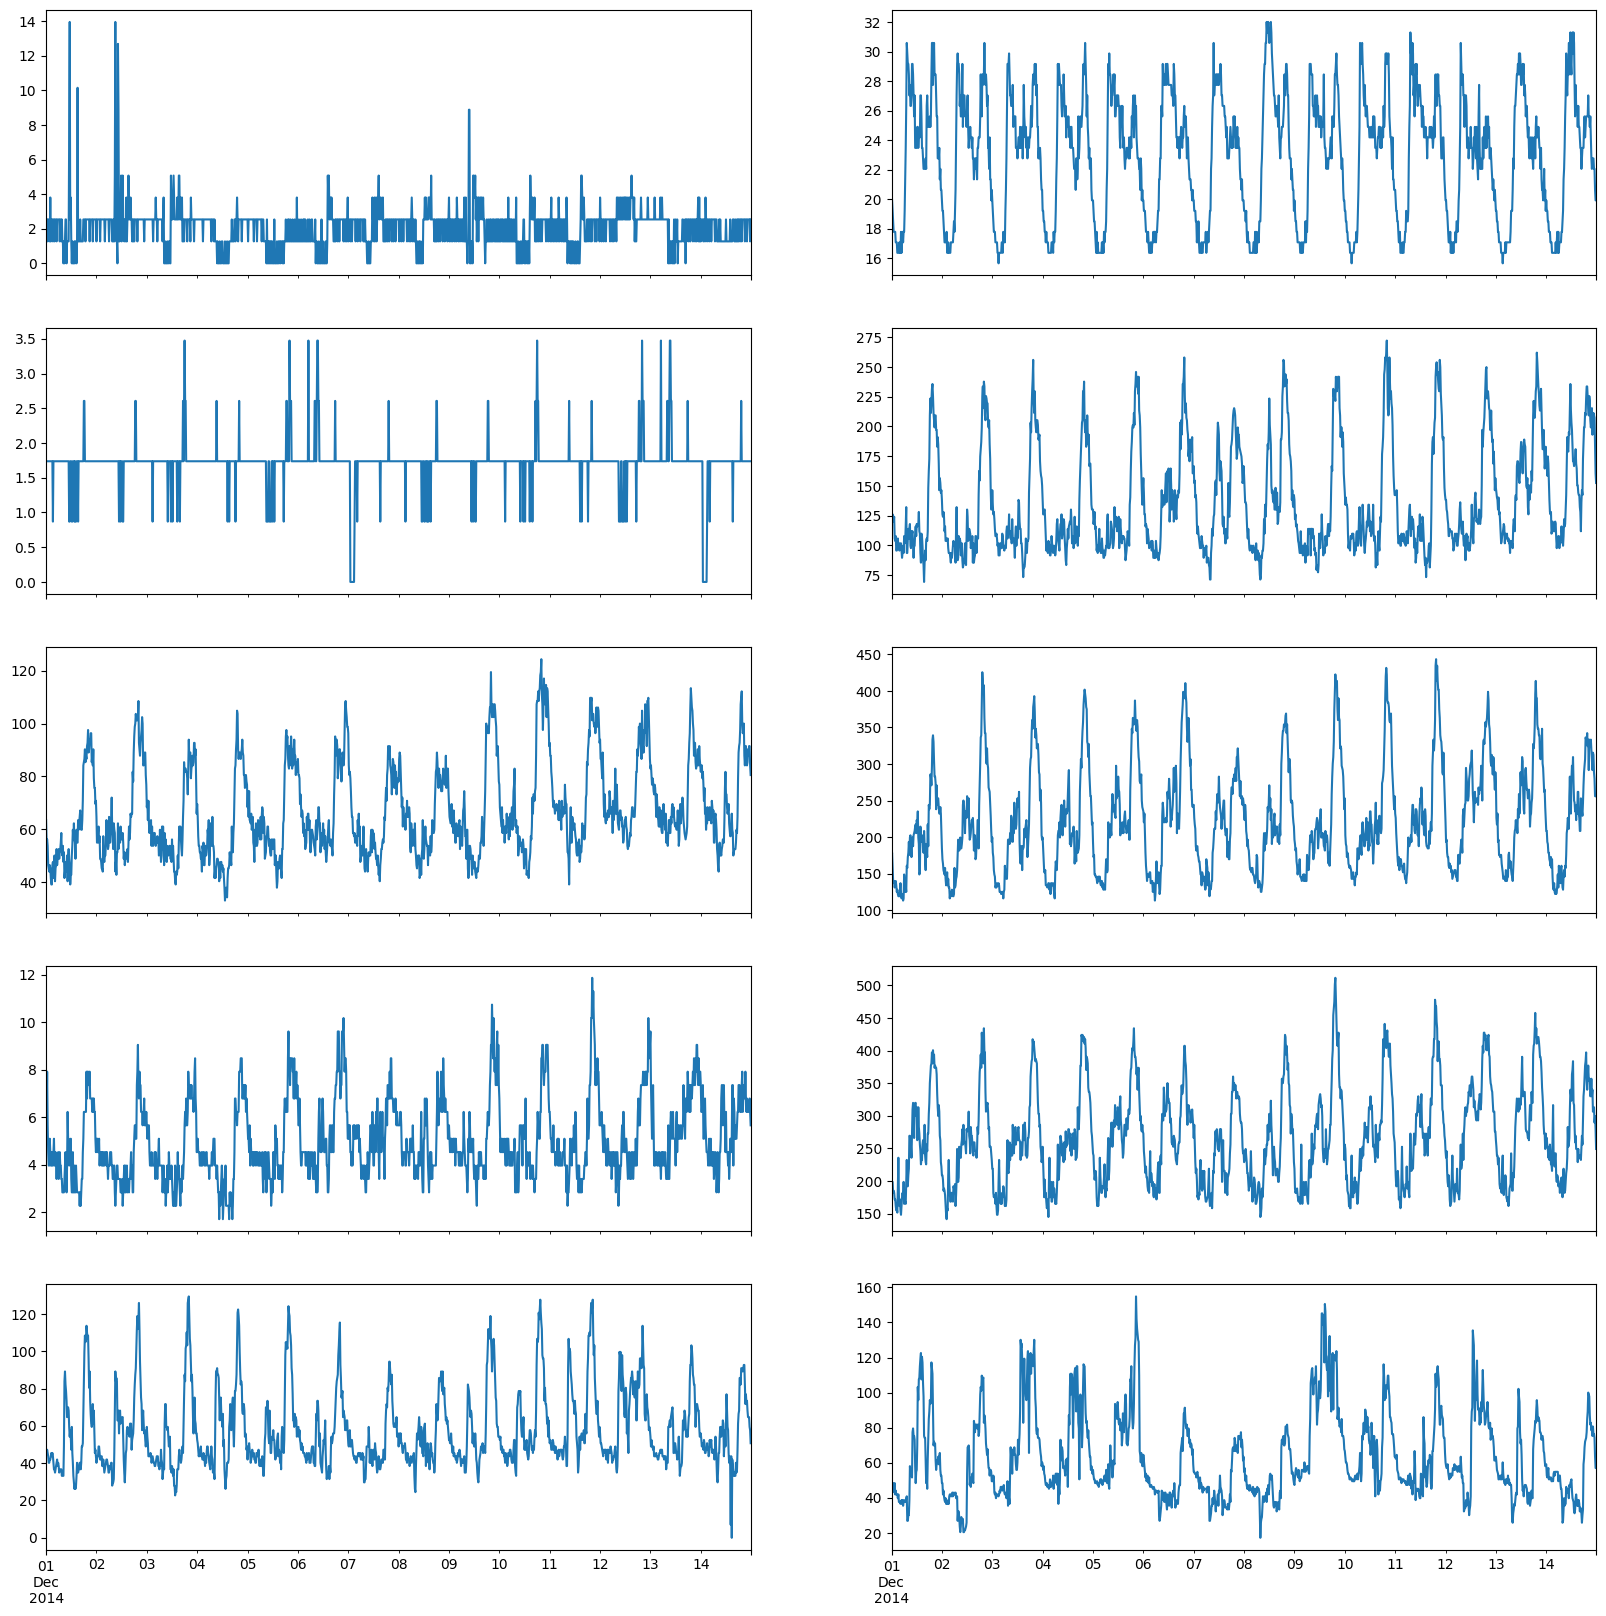

In [5]:
fig,axs = plt.subplots(5,2, figsize = (20,20), sharex = True)
axx = axs.ravel()
for i in range(0,10):
    df[df.columns[i]].loc["2014-12-01":"2014-12-14"].plot(ax=axx[i])


In [7]:
df_input=df.reset_index(drop=True).T.reset_index()
df_input

index    0    1    2    3    4    5    6    7    8  ...       140246  \
0    MT_001  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     2.538071   
1    MT_002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    22.048364   
2    MT_003  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     1.737619   
3    MT_004  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   156.504065   
4    MT_005  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    86.585366   
..      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...          ...   
365  MT_366  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     3.510825   
366  MT_367  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   546.971027   
367  MT_368  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   185.308848   
368  MT_369  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   653.958944   
369  MT_370  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  8594.594595   

          140247       140248       140249       140250       140251  \
0       1.269036     2.538071     2.538071     1.269036     2.538071   
1      22.048364    22.048364    22.048364    22.048364    22.048364   
2       1.737619     1.737619     1.737619     1.737619     1.737619   
3     164.634146   160.569106   162.601626   156.504065   150.406504   
4      93.902439    87.804878    80.487805    85.365854    85.365854   
..           ...          ...          ...          ...          ...   
365     6.436513    11.702750     8.191925     4.681100     5.851375   
366   521.510097   672.519754   719.051800   707.638279   697.102722   
367   173.622705   213.689482   205.342237   188.647746   176.961603   
368   658.357771   711.876833   694.281525   652.492669   651.026393   
369  7891.891892  7945.945946  7351.351351  7189.189189  7621.621622   

          140252       140253       140254       140255  
0       2.538071     2.538071     1.269036     2.538071  
1      21.337127    20.625889    21.337127    19.914651  
2       1.737619     1.737619     1.737619     1.737619  
3     166.666667   162.601626   166.666667   178.861789  
4      81.707317    82.926829    85.365854    84.146341  
..           ...          ...          ...          ...  
365     9.947338     9.362200     4.095963     4.095963  
366   671.641791   670.763828   664.618086   628.621598  
367   168.614357   153.589316   146.911519   131.886477  
368   669.354839   670.087977   646.627566   673.020528  
369  6702.702703  6864.864865  6540.540541  7135.135135  

[370 rows x 140257 columns]

In [8]:
ts_code =df_input["index"].astype('category').cat.codes.values

In [42]:
ts_code

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [72]:
df_train=df_input.iloc[:,1:134999].values
df_test=df_input.iloc[:,134999:].values

In [73]:
df_test

array([[2.53807107e+00, 2.53807107e+00, 2.53807107e+00, ...,
        2.53807107e+00, 1.26903553e+00, 2.53807107e+00],
       [1.84921764e+01, 1.70697013e+01, 2.06258890e+01, ...,
        2.06258890e+01, 2.13371266e+01, 1.99146515e+01],
       [1.73761946e+00, 1.73761946e+00, 1.73761946e+00, ...,
        1.73761946e+00, 1.73761946e+00, 1.73761946e+00],
       ...,
       [7.01168614e+01, 6.34390651e+01, 5.84307179e+01, ...,
        1.53589316e+02, 1.46911519e+02, 1.31886477e+02],
       [6.82551320e+02, 6.76686217e+02, 7.07478006e+02, ...,
        6.70087977e+02, 6.46627566e+02, 6.73020528e+02],
       [1.64324324e+04, 1.63783784e+04, 1.64864865e+04, ...,
        6.86486486e+03, 6.54054054e+03, 7.13513514e+03]])

In [74]:
df.iloc[134997:]

MT_001     MT_002    MT_003      MT_004     MT_005  \
2014-11-07 05:30:00  1.269036  17.780939  1.737619   95.528455  43.902439   
2014-11-07 05:45:00  2.538071  18.492176  1.737619   87.398374  47.560976   
2014-11-07 06:00:00  2.538071  17.069701  1.737619   81.300813  53.658537   
2014-11-07 06:15:00  2.538071  20.625889  1.737619   75.203252  53.658537   
2014-11-07 06:30:00  1.269036  22.048364  1.737619   85.365854  54.878049   
...                       ...        ...       ...         ...        ...   
2014-12-31 23:00:00  2.538071  22.048364  1.737619  150.406504  85.365854   
2014-12-31 23:15:00  2.538071  21.337127  1.737619  166.666667  81.707317   
2014-12-31 23:30:00  2.538071  20.625889  1.737619  162.601626  82.926829   
2014-12-31 23:45:00  1.269036  21.337127  1.737619  166.666667  85.365854   
2015-01-01 00:00:00  2.538071  19.914651  1.737619  178.861789  84.146341   

                         MT_006     MT_007      MT_008     MT_009     MT_010  \
2014-11-07 05:30:00   98.214286   3.957038  195.286195  41.958042  49.462366   
2014-11-07 05:45:00  101.190476   4.522329  161.616162  41.958042  50.537634   
2014-11-07 06:00:00  127.976190   5.087620  164.983165  43.706294  52.688172   
2014-11-07 06:15:00  113.095238   4.522329  171.717172  41.958042  51.612903   
2014-11-07 06:30:00  136.904762   3.957038  181.818182  43.706294  52.688172   
...                         ...        ...         ...        ...        ...   
2014-12-31 23:00:00  303.571429  11.305822  282.828283  68.181818  72.043011   
2014-12-31 23:15:00  324.404762  11.305822  252.525253  64.685315  72.043011   
2014-12-31 23:30:00  318.452381  10.175240  242.424242  61.188811  74.193548   
2014-12-31 23:45:00  285.714286  10.175240  225.589226  64.685315  72.043011   
2015-01-01 00:00:00  279.761905  10.175240  249.158249  62.937063  69.892473   

                     ...      MT_361   MT_362       MT_363       MT_364  \
2014-11-07 05:30:00  ...   97.787295  12300.0  1265.822785   886.363636   
2014-11-07 05:45:00  ...   98.501071  12500.0  1299.578059   909.090909   
2014-11-07 06:00:00  ...   98.501071  12300.0  1282.700422   909.090909   
2014-11-07 06:15:00  ...   98.501071  10900.0  1265.822785  1272.727273   
2014-11-07 06:30:00  ...   99.928622  10900.0  1291.139241  1250.000000   
...                  ...         ...      ...          ...          ...   
2014-12-31 23:00:00  ...  276.945039  28200.0  1616.033755  1363.636364   
2014-12-31 23:15:00  ...  279.800143  28300.0  1569.620253  1340.909091   
2014-12-31 23:30:00  ...  284.796574  27800.0  1556.962025  1318.181818   
2014-12-31 23:45:00  ...  246.252677  28000.0  1443.037975   909.090909   
2015-01-01 00:00:00  ...  188.436831  27800.0  1409.282700   954.545455   

                        MT_365     MT_366      MT_367      MT_368      MT_369  \
2014-11-07 05:30:00  24.771838   8.191925  548.726953   61.769616  709.677419   
2014-11-07 05:45:00  24.771838  11.117613  530.289728   70.116861  682.551320   
2014-11-07 06:00:00  24.771838   8.777063  539.947322   63.439065  676.686217   
2014-11-07 06:15:00  24.771838   7.606788  602.282704   58.430718  707.478006   
2014-11-07 06:30:00  24.771838   8.777063  497.805092   53.422371  745.601173   
...                        ...        ...         ...         ...         ...   
2014-12-31 23:00:00  29.986962   5.851375  697.102722  176.961603  651.026393   
2014-12-31 23:15:00  29.986962   9.947338  671.641791  168.614357  669.354839   
2014-12-31 23:30:00  27.379400   9.362200  670.763828  153.589316  670.087977   
2014-12-31 23:45:00  26.075619   4.095963  664.618086  146.911519  646.627566   
2015-01-01 00:00:00  27.379400   4.095963  628.621598  131.886477  673.020528   

                           MT_370  
2014-11-07 05:30:00  18054.054054  
2014-11-07 05:45:00  16432.432432  
2014-11-07 06:00:00  16378.378378  
2014-11-07 06:15:00  16486.486486  
2014-11-07 06:30:00  18540.540541  
...                           ...  
2014-12-31 

In [75]:
df_train.shape

(370, 134998)

In [76]:
df_test.shape

(370, 5258)

In [77]:
freq = "15min"
start_train=pd.Timestamp("2011-01-01 00:15:00", freq=freq)
start_test=pd.Timestamp ("2014-11-07 05:30:00", freq=freq)
# prediction length of a week
#freq=15 min, 1 hour = 4 Observations, 24 hours = 24*4=96, hence for seven days = 7*96=672
prediction_length=672


<ipython-input-77-279da951cfd2>:2: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  start_train=pd.Timestamp("2011-01-01 00:15:00", freq=freq)
<ipython-input-77-279da951cfd2>:3: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  start_test=pd.Timestamp ("2014-11-07 05:30:00", freq=freq)


In [78]:
estimator = DeepAREstimator (freq=freq,
                            context_length = 672,
                            prediction_length = prediction_length,
                            use_feat_static_cat= True,
                            cardinality=[1], 
                            num_layers=2,
                            num_cells=32,
                            cell_type='lstm',
                            trainer = Trainer(epochs = 5))


In [79]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
train_ds = ListDataset(
        [
           {   
            FieldName.TARGET:target,
            FieldName.START:start_train,
            FieldName.FEAT_STATIC_CAT:fsc
            }
        for(target,fsc) in zip (df_train,ts_code.reshape(-1,1))
       ],freq = freq)



In [80]:
test_ds = ListDataset([
    {
    FieldName.TARGET: target,
    FieldName.START: start_test,
    FieldName.FEAT_STATIC_CAT: fsc
}
for(target,fsc) in zip(df_test,ts_code.reshape(-1,1))
], freq = freq)

In [84]:
next(iter(train_ds))

{'target': array([0.       , 0.       , 0.       , ..., 2.5380712, 2.5380712,
        1.2690356], dtype=float32),
 'start': Period('2011-01-01 00:15', '15T'),
 'feat_static_cat': array([0], dtype=int32)}

In [85]:
predictor = estimator.train(training_data = train_ds)

100%|██████████| 50/50 [06:20<00:00,  7.62s/it, epoch=5/5, avg_epoch_loss=4.04]


In [87]:
from gluonts.model import forecast
from gluonts.evaluation.backtest import make_evaluation_predictions
forecast_it , ts_it = make_evaluation_predictions ( 
                                                    dataset = test_ds,
                                                    predictor = predictor,
                                                    num_samples = 100, 
                                                   )
                      

In [88]:
from tqdm.autonotebook import tqdm 
print("Obtaining time series conditioning values...")
tss = list(tqdm(ts_it, total = len(df_test)))
print("Obtaining time series predictions...")
forecasts = list(tqdm(forecast_it, total =len(df_test)))


Obtaining time series conditioning values...


<ipython-input-88-adeff1e5ce2c>:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/370 [00:00<?, ?it/s]

Obtaining time series predictions...


  0%|          | 0/370 [00:00<?, ?it/s]

In [89]:
def plot_prob_forecasts(ts_entry, forecast_entry):
     plot_length = prediction_length 
     prediction_intervals = (80.0,95.0)
     legend = ["Observation","Median Prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

     fig, ax =plt.subplots(1,1,figsize = (10,7)) 
     ts_entry[-plot_length:].plot(ax=ax)
     forecast_entry.plot(prediction_intervals =prediction_intervals, color ="g")
     plt.grid(which ="both")
     plt.legend(legend,loc="upper left")
     plt.show()
     

  0%|          | 0/20 [00:00<?, ?it/s]

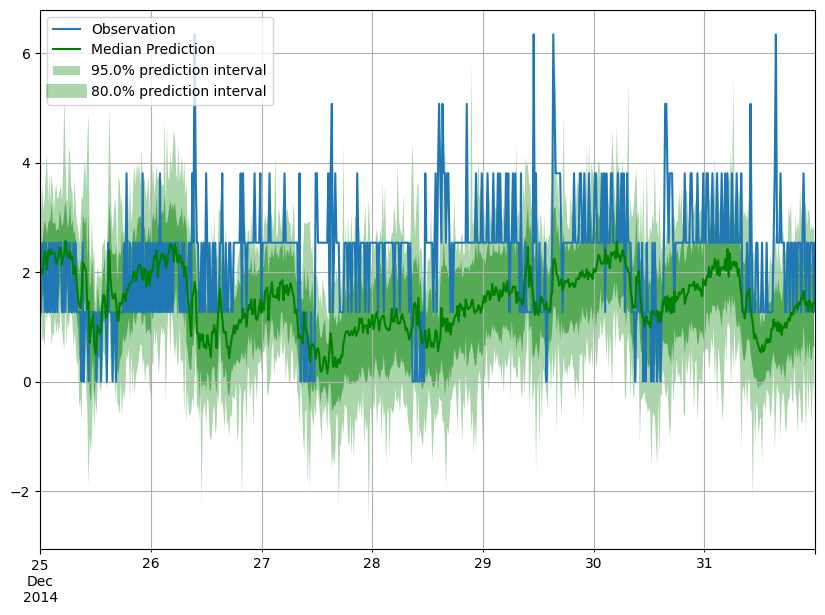

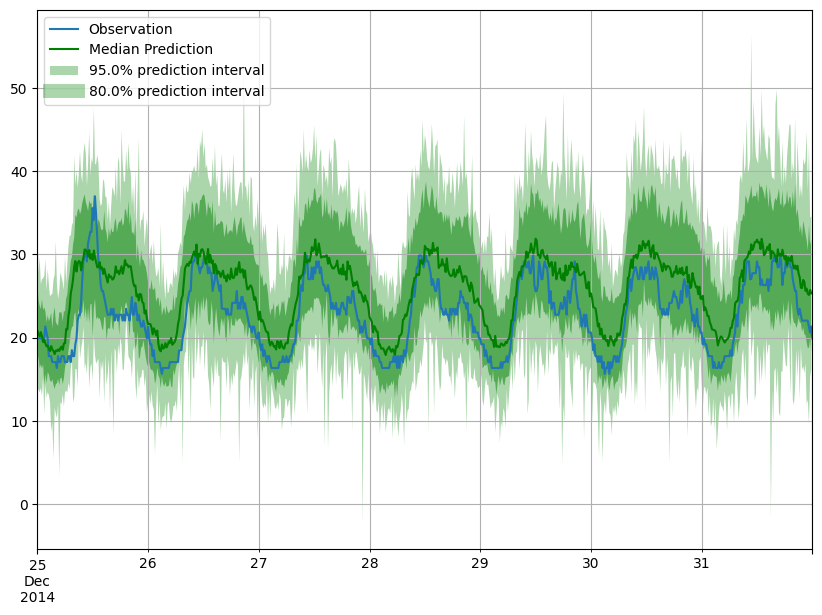

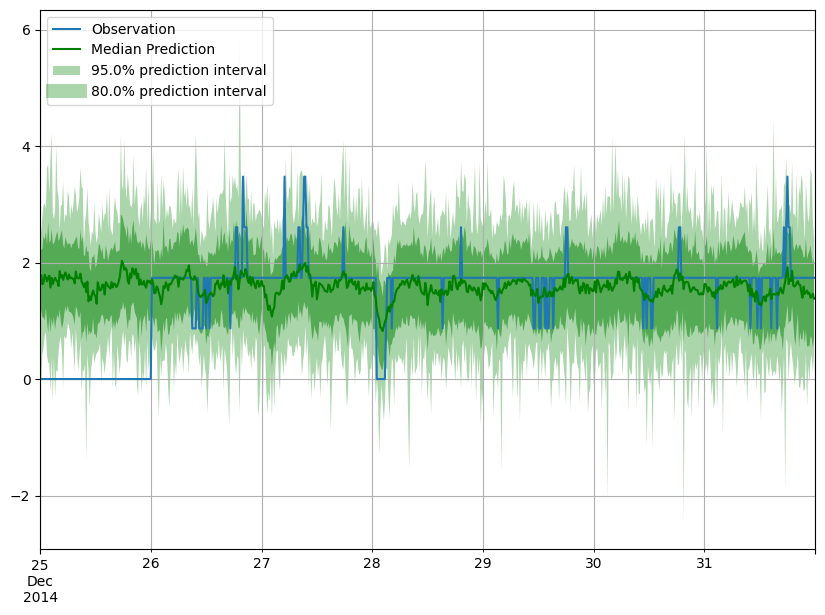

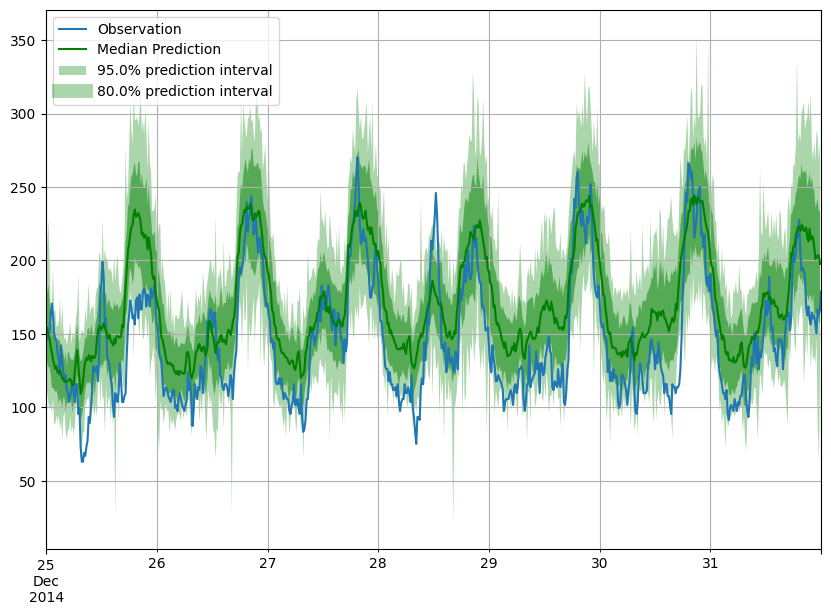

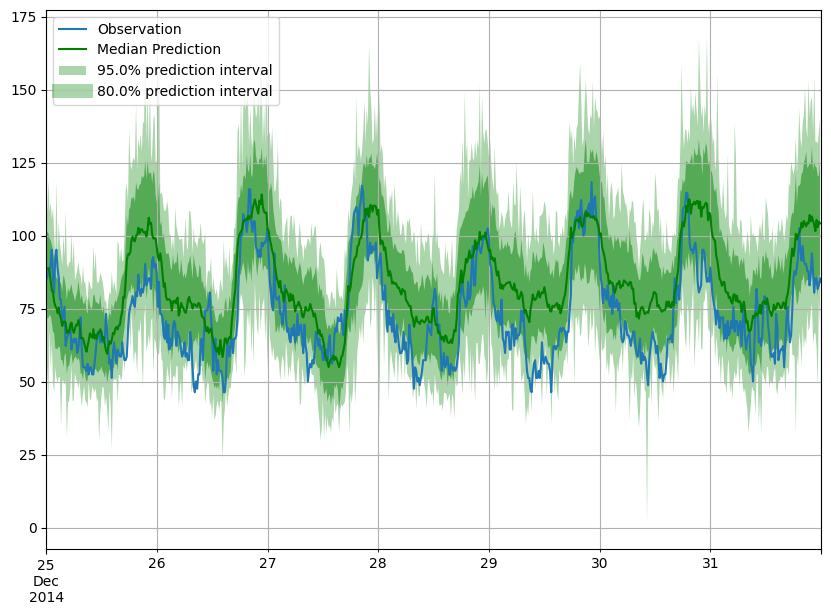

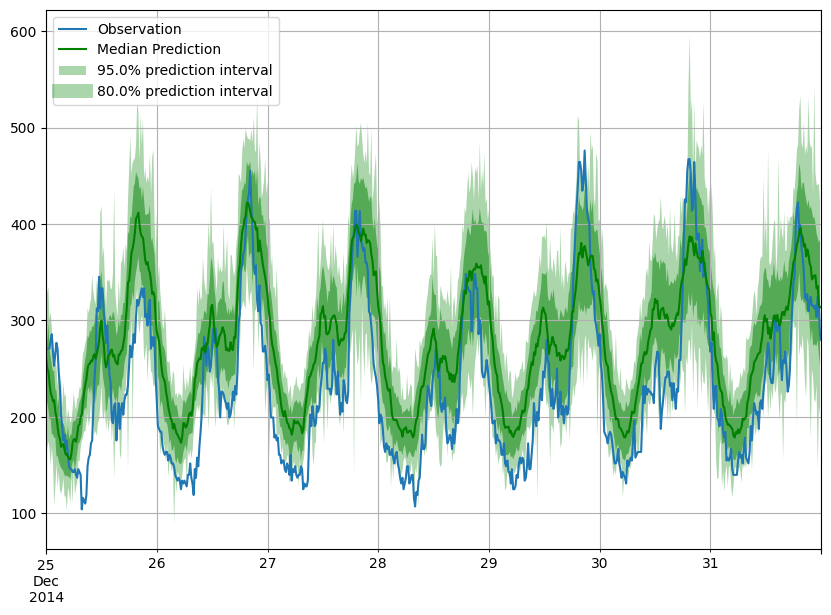

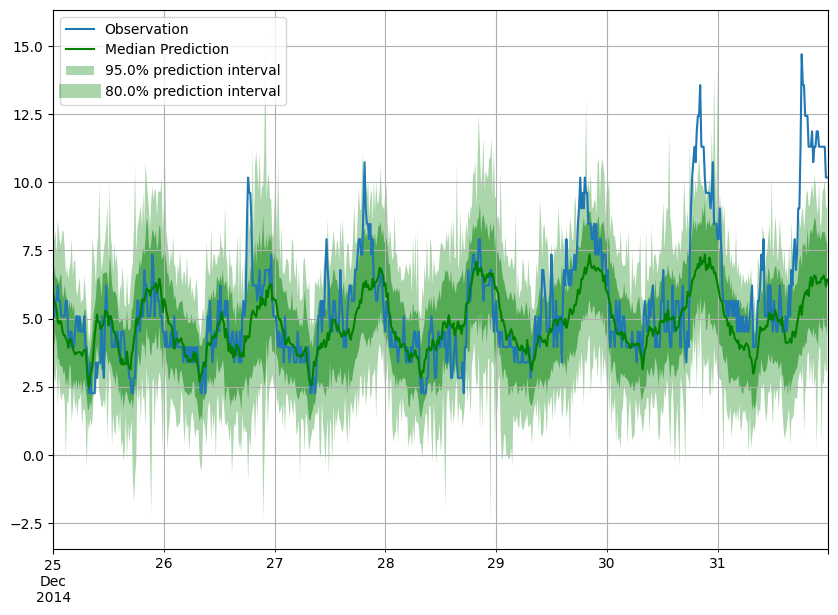

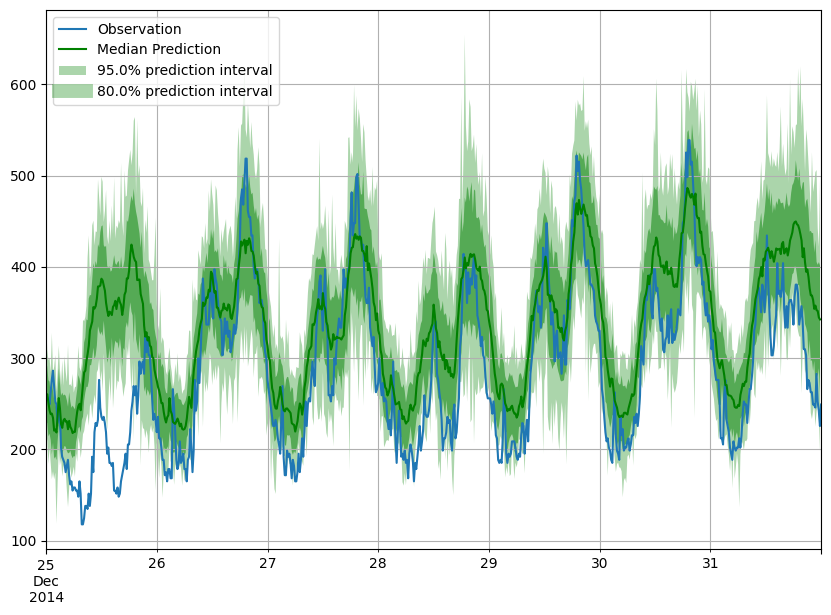

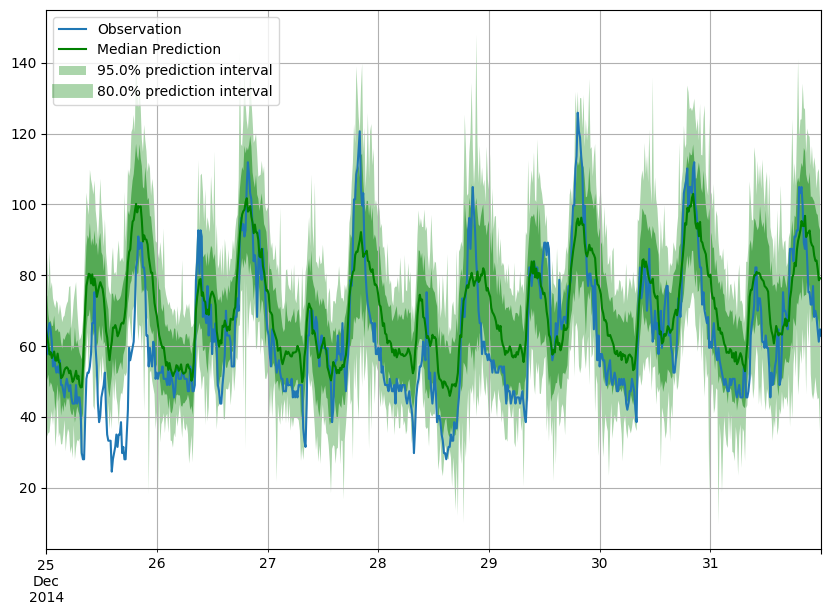

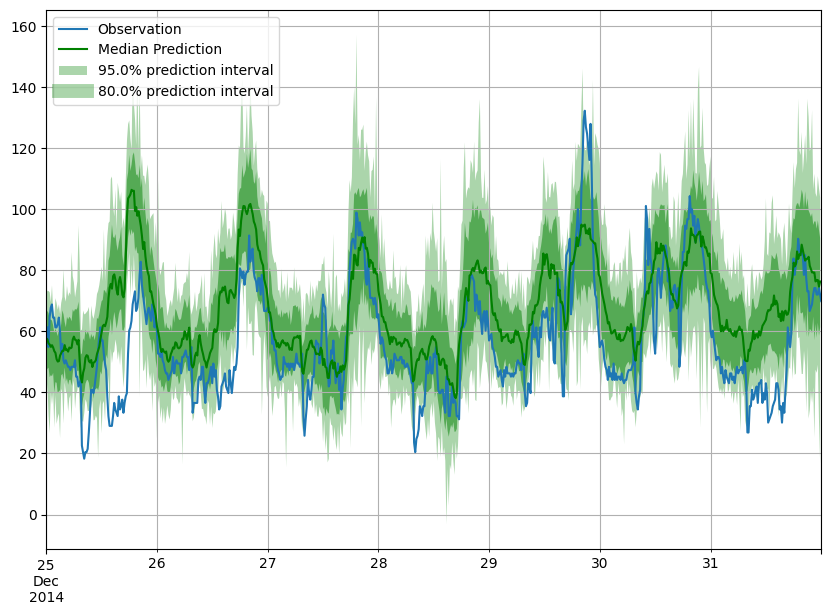

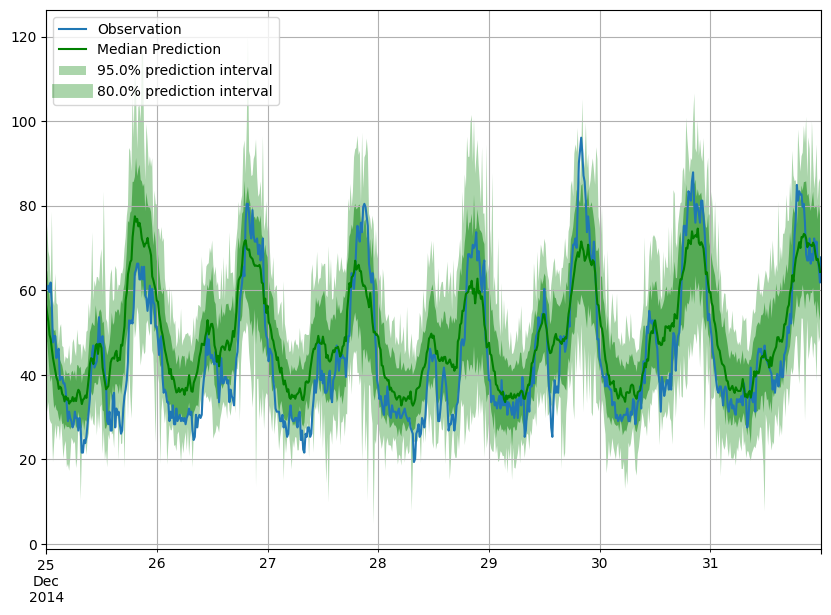

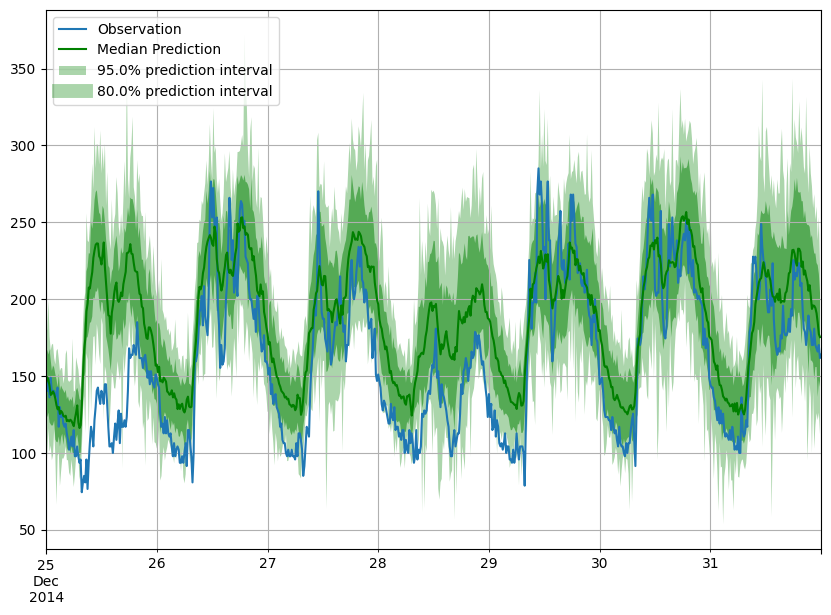

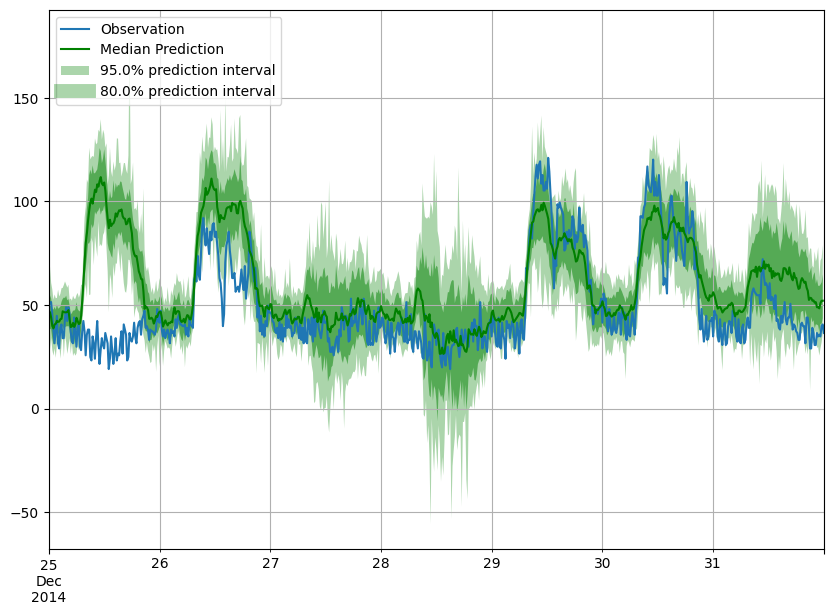

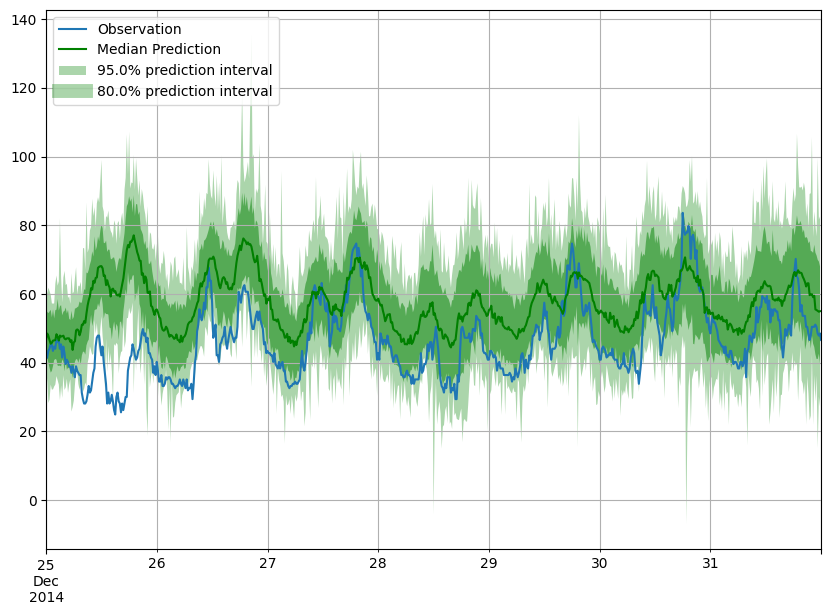

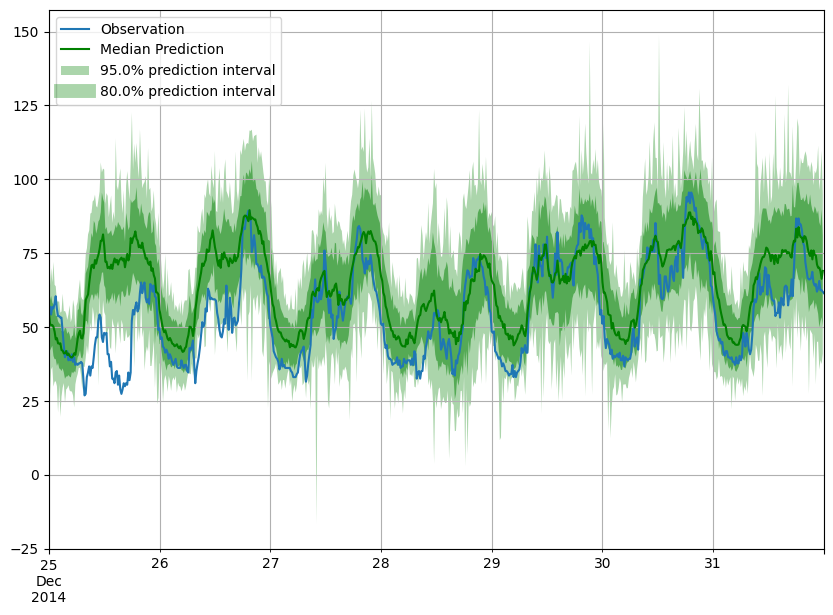

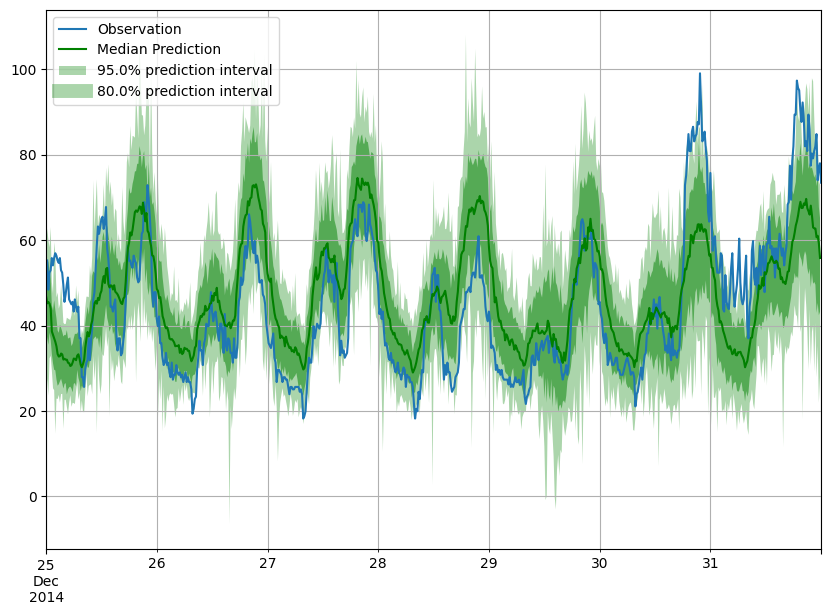

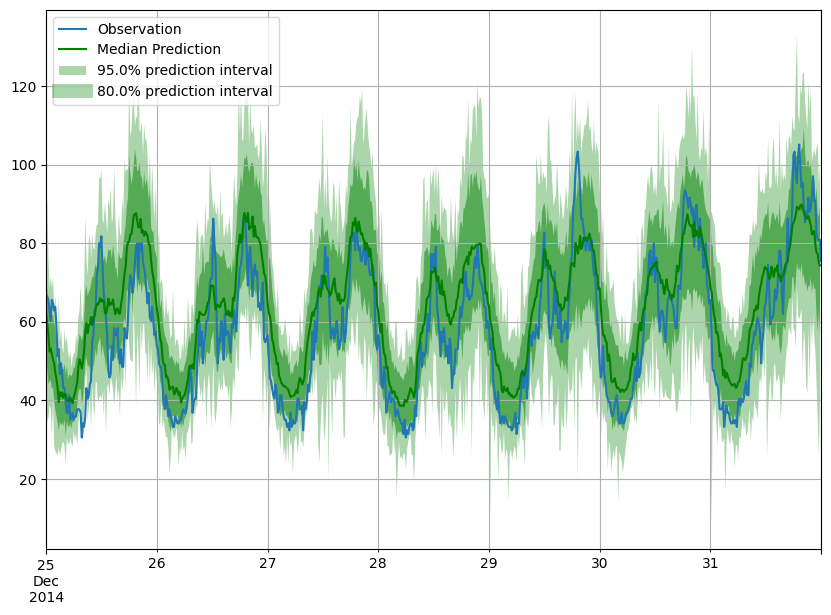

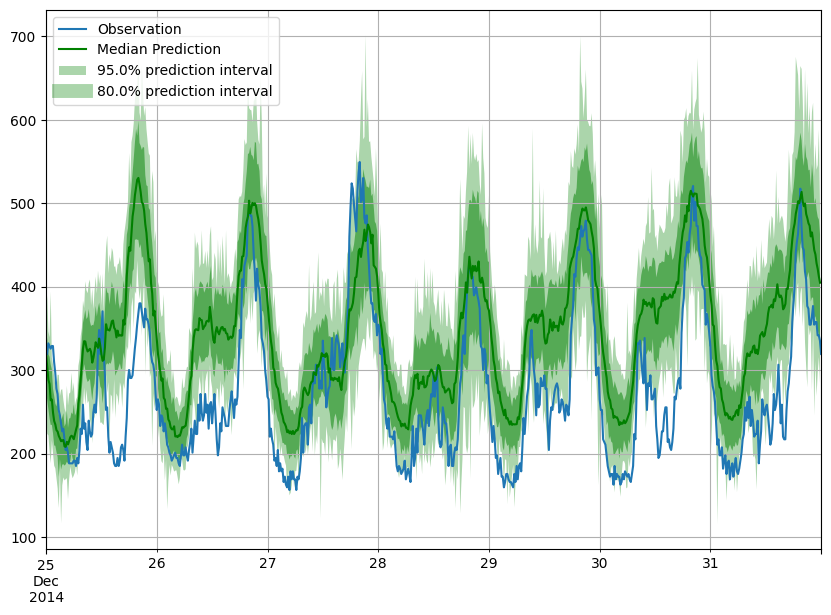

In [ ]:
for i in tqdm(range(20)):
  ts_entry =tss[i]
  forecast_entry = forecasts[i]
  plot_prob_forecasts(ts_entry,forecast_entry)

In [95]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series = len(df_test))

Running evaluation: 100%|██████████| 370/370 [00:00<00:00, 689.96it/s]
/usr/local/lib/python3.9/dist-packages/pandas/core/dtypes/astype.py:170: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


In [96]:
item_metrics

item_id    forecast_start           MSE     abs_error  abs_target_sum  \
0      None  2014-12-25 00:00  1.835849e+00  7.265309e+02    1.513959e+03   
1      None  2014-12-25 00:00  1.203966e+01  2.073460e+03    1.532006e+04   
2      None  2014-12-25 00:00  5.101355e-01  3.020300e+02    9.843615e+02   
3      None  2014-12-25 00:00  9.286526e+02  1.794915e+04    9.845528e+04   
4      None  2014-12-25 00:00  1.870524e+02  7.991148e+03    4.930366e+04   
..      ...               ...           ...           ...             ...   
365    None  2014-12-25 00:00  4.690327e+01  3.494829e+03    5.451141e+03   
366    None  2014-12-25 00:00  1.604768e+04  7.176191e+04    3.604776e+05   
367    None  2014-12-25 00:00  2.856214e+03  2.489239e+04    7.184307e+04   
368    None  2014-12-25 00:00  2.295910e+04  9.364806e+04    4.997705e+05   
369    None  2014-12-25 00:00  2.095704e+07  2.439155e+06    9.844972e+06   

     abs_target_mean  seasonal_error      MASE      MAPE     sMAPE        ND  \
0           2.252916        0.931286  1.160919  0.427933  0.620061  0.479888   
1          22.797703        1.305572  2.363336  0.142656  0.130772  0.135343   
2           1.464824        0.203948  2.203748  0.144894  0.431714  0.306828   
3         146.510835       16.799753  1.589907  0.207309  0.182021  0.182308   
4          73.368536        7.521593  1.580994  0.176760  0.158236  0.162080   
..               ...             ...       ...       ...       ...       ...   
365         8.111817        8.533755  0.609420  0.882161  0.539112  0.641119   
366       536.425037       81.746381  1.306340  0.223248  0.191528  0.199075   
367       106.909331       43.768938  0.846314  0.599013  0.348955  0.346483   
368       743.706148       54.752826  2.545206  0.191038  0.171627  0.187382   
369     14650.255952     2816.722049  1.288624  0.348445  0.282040  0.247756   

          MSIS  QuantileLoss[0.1]  Coverage[0.1]  QuantileLoss[0.5]  \
0    11.206207       2.547896e+02       0.090774       7.265309e+02   
1    16.528197       4.568402e+02       0.061012       2.073460e+03   
2    24.868034       2.781310e+02       0.168155       3.020300e+02   
3     8.532301       8.839339e+03       0.500000       1.794915e+04   
4     8.275226       2.932711e+03       0.336310       7.991148e+03   
..         ...                ...            ...                ...   
365   6.294743       2.396174e+03       0.436012       3.494829e+03   
366  10.952547       5.367308e+04       0.580357       7.176191e+04   
367  14.691335       2.250342e+04       0.272321       2.489240e+04   
368  13.003239       5.115068e+04       0.712798       9.364806e+04   
369  23.013271       1.914219e+06       0.312500       2.439155e+06   

     Coverage[0.5]  QuantileLoss[0.9]  Coverage[0.9]  
0         0.209821       5.802496e+02       0.488095  
1         0.950893       1.160635e+03       1.000000  
2         0.284226       1.224643e+02       0.965774  
3         0.864583       7.014447e+03       0.973214  
4         0.846726       3.386338e+03       0.979167  
..             ...                ...            ...  
365       0.730655       1.857298e+03       0.877976  
366       0.904762       2.521422e+04       0.977679  
367       0.553571       1.245808e+04       0.755952  
368       1.000000       3.316739e+04       1.000000  
369       0.492560       1.598888e+06       0.647321  

[370 rows x 18 columns]